
# **ՀՀ շուկայում բնակարանների գները․ Աշխատանք տվյալների հետ**

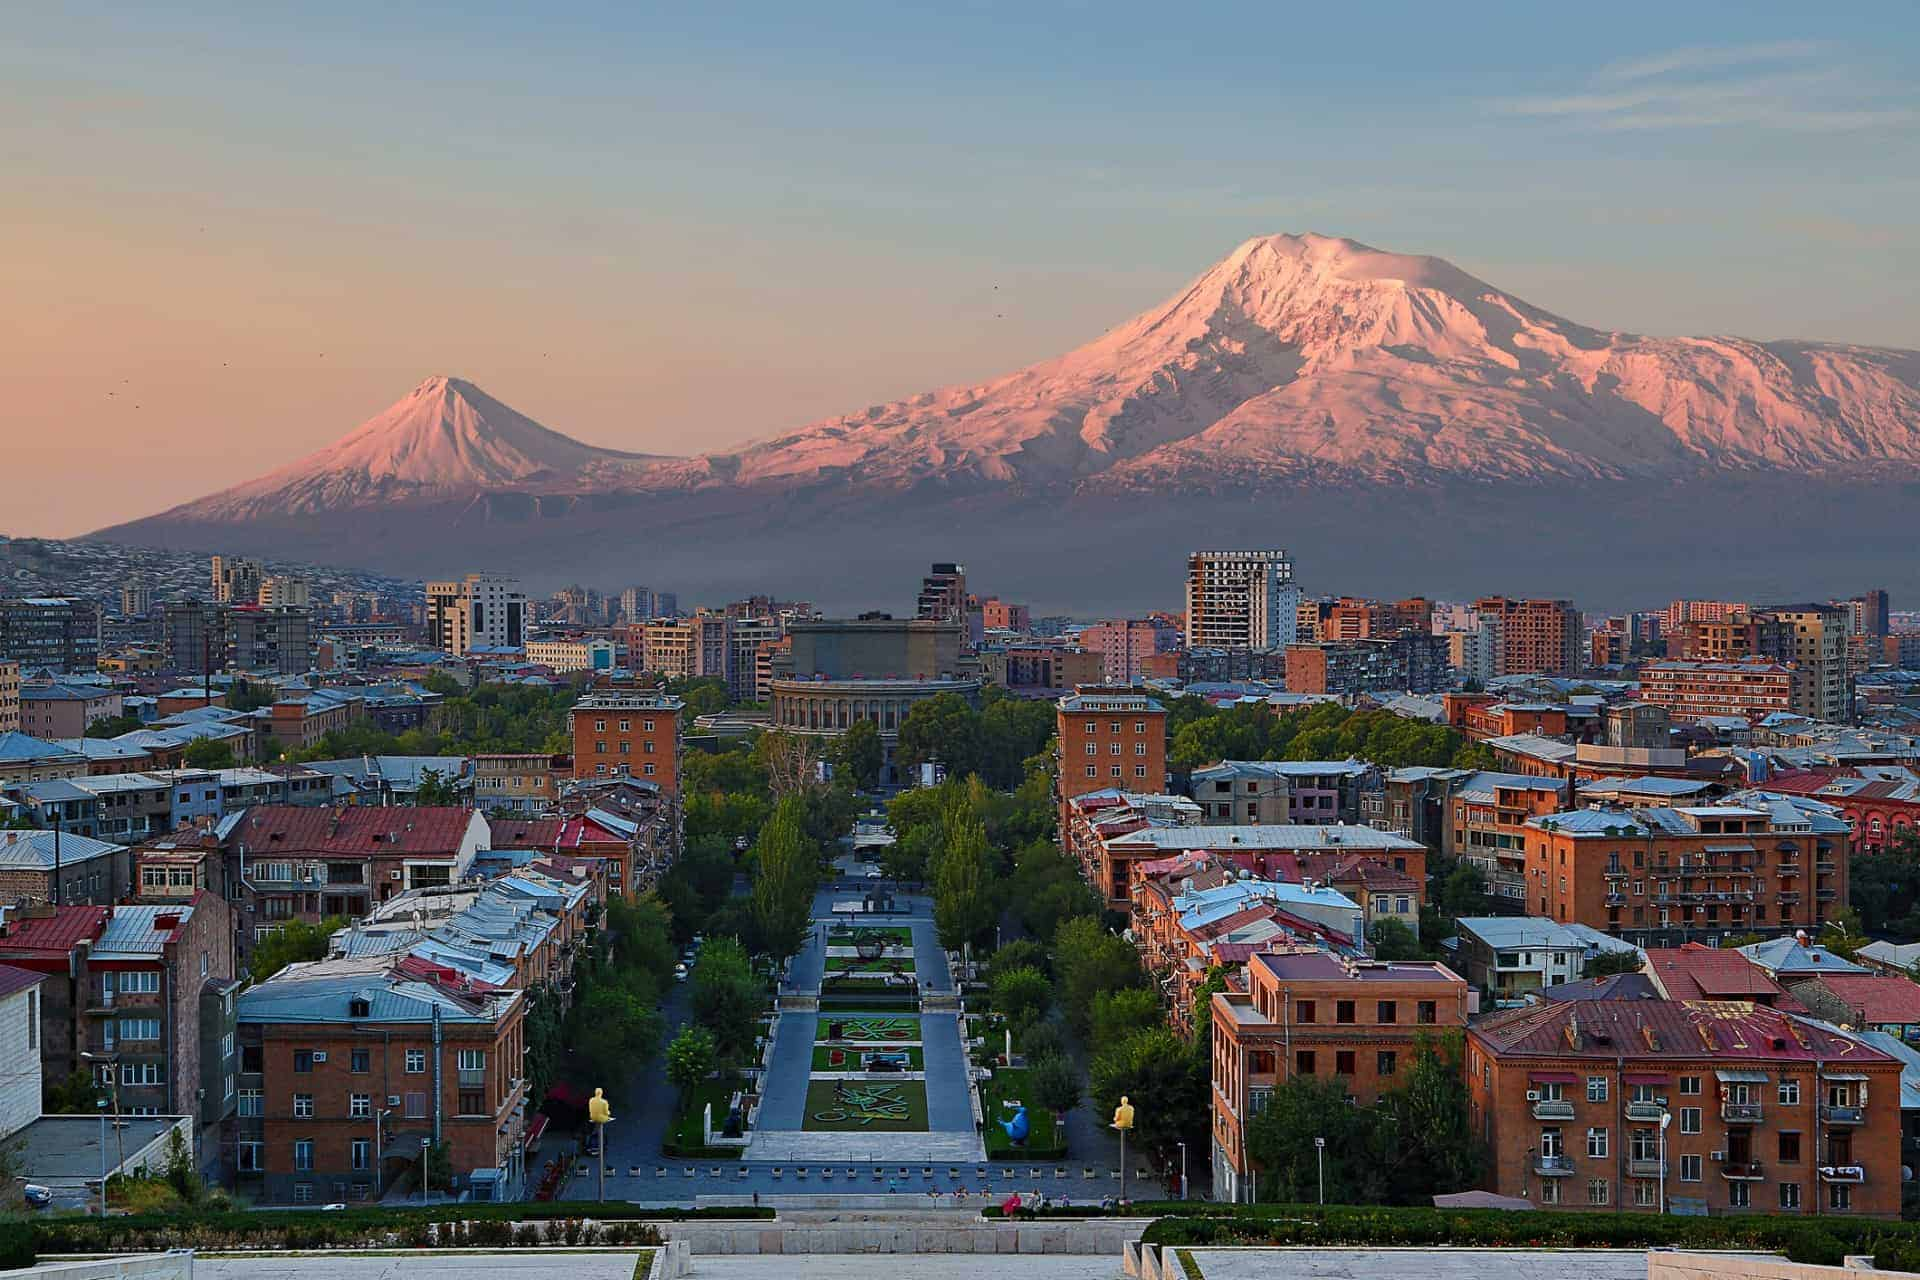

# **1) About Project**

Նախագծի նպատակն է ստեղծել Հայաստանում վաճառվող բնակարանների տվյալների շտեմարան և կատարել բնութագրական վերլուծություն։

Տվյալների աղբյուր է ընտրվել բնակարանների վաճառքի խոշոր վեբ կայքերից մեկը՝ list.am-ը։

Բնութագրիչների ցանկը ներկայացված է ստորև․

1) Շինության տիպ

2) Նորակառույց

3) Վերելակ

4) Հարկերի քանակ

5) Հարկ

6) Առկա են

7) Կայանատեղի

8) Ընդհանուր մակերես

9) Սենյակների քանակ

10) Սանհանգույցների քանակ

11) Առաստաղի բարձրություն

12) Պատշգամբ

13) Կահույք

14) Վերանորոգում

15) Կենցաղային տեխնիկա

16) Տեսարաններ պատուհաններից

17) Գին

18) Հասցե

19) Տարածաշրջան


## **1.1 Data Source**

Կայք՝  https://list.am/

Տվյալները դուրս են բերվելու web scraping-ի միջոցով։

## **1.2 Defining outcomes**
Տվյալների վերլուծության արդյունքում նախատեսվում է ստանալ հետևյալ հարցերի պատասխանները․

---
*   Որտե՞ղ են գտնվում Հայաստանյան վաճառքի ենթակա բնակարանների գերակշիռ մասը
*   Վերանորոգումից կախված՝ ո՞ր բնակարաններն են գերակշռում վաճառքի շուկայում
---
*   Ինչպես է կախված գինը վերանորոգումից և նորակառույց լինլելուց
*   Ո՞ր հարկերում եմ գտվում ամենաթանկարժեք բնակարանները
---
*   Ի՞նչ բաշխվածություն կա բնակարանների հարկերի և շինության տիպերի միջև
*   Ինչքա՞ն Է բնակարանների միջին գինը կախված սենյակների քանակից
---
*   Ո՞ր հարկերում գտնվող բնակարաններն առավել շատ վաճառվում
*   Քանի՞ սենյականոց բնակարաններն առավել շատ վաճառվում
---

# **2) Web scraping**


## **2.1 Website scraping code**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# moduls for scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

In [ ]:
def write_in_csv(data):
    """This function is writing into csv file."""

    data = data.text.split('\n')
    for info in data:
        with open("data.csv", "a", encoding='UTF8') as f:
            f.write(info)
            f.write('\n')

In [ ]:
def read_house_info(url):
    driver.get(url)
    houses = driver.find_elements(By.CLASS_NAME, "c")
    prices = driver.find_elements(By.CLASS_NAME, "price")

    for house in houses:
        try:
            write_in_csv(house)
        except:
            pass

    for price in prices:
        try:
            write_in_csv(price)
        except:
            pass

In [ ]:
# # Chrome browser
# driver = webdriver.Edge()

# # Taking data page-by-page.
# for i in range(1, 3):
#     print(i)
#     try:
#         url = f'https://www.list.am/category/60/{str(i)}'
#         driver.get(url)
#     except:
#         pass
#     urls_list = []
#     anchor_element = driver.find_elements(By.CSS_SELECTOR, 'a')
#     for i in anchor_element:
#         try:
#             href_value = i.get_attribute("href")
#             if href_value and (href_value.startswith(f'https://www.list.am/item/2') or href_value.startswith('https://www.list.am/item/1')):
#                 urls_list.append(href_value)
#         except:
#             print(i)

#     try:
#         for i in urls_list:
#             read_house_info(i)
#     except:
#         pass

## **2.2 Create csv file**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with (open('data_with_location.csv', encoding='UTF8') as source,
        open('data_with_location_after_cleaning.csv', 'a', encoding='UTF8') as res):
    source_text = True
    while source_text:
        source_text = source.readline()
        if not source_text.startswith(('Բաժիններ', 'Իմ էջը', 'Տեղադրել հայտարարություն',
                                        'ՏեղեկանքՀետադարձ կապՕգտագործման համաձայնագիր', '© 2005-2023 List.am')):
            res.write(source_text)

## **2.3 The Dataset**

In [ ]:
def get_house(houses):
    data = {'Շինության տիպ': [],
            'Նորակառույց': [],
            'Վերելակ': [],
            'Հարկերի քանակ': [],
            'Հարկ': [],
            'Առկա են': [],
            'Կայանատեղի': [],
            'Ընդհանուր մակերես': [],
            'Սենյակների քանակ': [],
            'Սանհանգույցների քանակ': [],
            'Առաստաղի բարձրություն': [],
            'Պատշգամբ': [],
            'Կահույք': [],
            'Վերանորոգում': [],
            'Կենցաղային տեխնիկա': [],
            'Տեսարաններ պատուհաններից': [],
            'Գին': [],
            'Հասցե': []
             }

    for house in houses:
        house = house.split('\n')
        if len(house) > 1:
            for key in data.keys():
                if key != 'Գին' and key != 'Հասցե':
                    if key in house:
                        data[key].append(house[house.index(key) + 1])
                    else:
                        data[key].append(None)
                elif key == 'Գին':
                    if house[-2].startswith('$') or house[-2].endswith('֏'):
                        data['Գին'].append(house[-2])
                    else:
                        data['Գին'].append(None)
                else:
                    if house[-1]:
                        data['Հասցե'].append(house[-1])
                    else:
                        data['Հասցե'].append(None)
    return data

In [ ]:
with open('data_with_location_after_cleaning.csv', encoding='UTF8') as res:
    count = 0
    houses = res.read()
    houses = houses.split('\n\n')
    data = get_house(houses)

df = pd.DataFrame(data)
df

,Շինության տիպ,Նորակառույց,Վերելակ,Հարկերի քանակ,Հարկ,Առկա են,Կայանատեղի,Ընդհանուր մակերես,Սենյակների քանակ,Սանհանգույցների քանակ,Առաստաղի բարձրություն,Պատշգամբ,Կահույք,Վերանորոգում,Կենցաղային տեխնիկա,Տեսարաններ պատուհաններից,Գին,Հասցե
0,Պանելային,Ոչ,Առկա է,16,5,None,None,96 ք.մ.,3,1,"2,75 մ",Բաց պատշգամբ,Համաձայնությամբ,Կոսմետիկ վերանորոգում,None,None,"$153,000","Երվանդ Քոչարի փողոց, Երևան"
1,Մոնոլիտ,Այո,Առկա է,8,3,Խաղահրապարակ,None,55 ք.մ.,2,1,3 մ,Բաց պատշգամբ,Առկա չէ,Չվերանորոգված,None,None,"$55,000","Սևանի փողոց 1/4, Աբովյան"
2,Մոնոլիտ,Այո,Առկա է,14,14,"Դոմոֆոն, դռնապահ, խաղահրապարակ",None,96 ք.մ.,3,1,3 մ,Առկա չէ,Առկա է,Կապիտալ վերանորոգված,"Օդորակիչ, սառնարան, սալօջախ, լվացքի մեքենա","Տեսարան դեպի բակ, տեսարան դեպի փողոց","$265,000","Արղության փողոց, Երևան"
3,Քարե,Ոչ,Առկա չէ,5,3,Դոմոֆոն,None,87 ք.մ.,3,1,"2,75 մ",Փակ պատշգամբ,Մասնակի կահույք,Կապիտալ վերանորոգված,Օդորակիչ,"Տեսարան դեպի բակ, տեսարան դեպի փողոց","$158,000","Գյուլբենկյան փողոց, Երևան"
4,Քարե,Ոչ,Առկա չէ,4,4,Դոմոֆոն,None,37 ք.մ.,2,1,3 մ,Բաց պատշգամբ,Առկա է,Կապիտալ վերանորոգված,"Օդորակիչ, սառնարան, սալօջախ, աման լվացող մեքեն...",Տեսարան դեպի փողոց,"$138,000","Տիգրան Մեծի պողոտա 32, Երևան"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26122,Մոնոլիտ,Այո,Առկա է,9,2,"Դոմոֆոն, խաղահրապարակ",Բացօթյա կայանատեղի,277 ք.մ.,4,3+,3 մ,Մի քանի պատշգամբ,Առկա չէ,Դիզայներական ոճով վերանորոգված,Օդորակիչ,"Տեսարան դեպի բակ, տեսարան դեպի փողոց, տեսարան ...","$650,000","Տիգրան Պետրոսյանի փողոց 1/7, Երևան"
26123,Քարե,Այո,Առկա է,10,4,"Դոմոֆոն, դռնապահ, խաղահրապարակ",Բացօթյա կայանատեղի,49 ք.մ.,2,1,3 մ,Մի քանի պատշգամբ,Առկա է,Եվրովերանորոգված,"Սառնարան, սալօջախ, լվացքի մեքենա","Տեսարան դեպի բակ, տեսարան դեպի փողոց, տեսարան ...","$84,000","Олимпийская улица, Цахкадзор"
26124,Մոնոլիտ,Այո,Առկա է,8,5,"Դռնապահ, խաղահրապարակ","Բացօթյա կայանատեղի, ծածկապատ կայանատեղի",47 ք.մ.,2,1,"2,8 մ",Բաց պատշգամբ,Առկա է,Եվրովերանորոգված,"Սառնարան, սալօջախ, լվացքի մեքենա",Տեսարան դեպի բակ,"$63,000",Կոտայք › Ծաղկաձոր
26125,Մոնոլիտ,Այո,Առկա է,12,4,"Դոմոֆոն, խաղահրապարակ","Բացօթյա կայանատեղի, ավտոտնակ",92 ք.մ.,3,1,3 մ,Մի քանի պատշգամբ,Առկա չէ,Չվերանորոգված,None,"Տեսարան դեպի բակ, տեսարան դեպի փողոց, տեսարան ...","$120,000","Gyurjyan street, Yerevan"


# **3) Data Preprocessing and Cleaning**

## **3.1 Data Preprocessing**

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26127 entries, 0 to 26126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Շինության տիպ             25978 non-null  object
 1   Նորակառույց               25977 non-null  object
 2   Վերելակ                   25977 non-null  object
 3   Հարկերի քանակ             25978 non-null  object
 4   Հարկ                      25978 non-null  object
 5   Առկա են                   11104 non-null  object
 6   Կայանատեղի                10155 non-null  object
 7   Ընդհանուր մակերես         25976 non-null  object
 8   Սենյակների քանակ          25978 non-null  object
 9   Սանհանգույցների քանակ     25977 non-null  object
 10  Առաստաղի բարձրություն     25977 non-null  object
 11  Պատշգամբ                  25977 non-null  object
 12  Կահույք                   25954 non-null  object
 13  Վերանորոգում              25976 non-null  object
 14  Կենցաղային տեխնիկա    

In [ ]:
df.drop(['Առկա են', 'Կայանատեղի', 'Կենցաղային տեխնիկա', 'Տեսարաններ պատուհաններից'], axis = 1, inplace = True)

df = df.dropna()
df = df.drop_duplicates()

In [ ]:
exchange_rate = 400
def convert_amd_to_usd(value):
    if not value.replace('֏', '').replace('$', '').isnumeric():
        return None
    if '֏' in value:
        amd_value = float(value.replace('֏', '').replace(',', ''))
        return amd_value / exchange_rate
    else:
        return float(value.replace('$', '').replace(',', ''))

In [ ]:
df['Նորակառույց'] = (df['Նորակառույց'] == 'Այո')
df['Վերելակ'] = (df['Վերելակ'] == 'Առկա է')
df['Պատշգամբ'] = (df['Պատշգամբ'] != 'Առկա չէ')
df['Ընդհանուր մակերես'] = df['Ընդհանուր մակերես'].str.replace('ք.մ.', '', regex=True)
df['Առաստաղի բարձրություն'] = df['Առաստաղի բարձրություն'].str.replace('մ', '', regex=True)
df['Հարկերի քանակ'] = df['Հարկերի քանակ'].str.replace(r'\D', '', regex=True)
df['Հարկ'] = df['Հարկ'].str.replace(r'\D', '', regex=True)
df['Սանհանգույցների քանակ'] = df['Սանհանգույցների քանակ'].str.replace(r'\D', '', regex=True)
df['Գին'] = df['Գին'].str.replace(',', '', regex=True)
df['Գին'] = df['Գին'].apply(convert_amd_to_usd)

In [ ]:
df['Նորակառույց'] = df['Նորակառույց'].astype(int)
df['Վերելակ'] = df['Վերելակ'].astype(int)
df['Հարկերի քանակ'] = df['Հարկերի քանակ'].astype(int)
df['Ընդհանուր մակերես'] = df['Ընդհանուր մակերես'].astype(int)
df['Սանհանգույցների քանակ'] = df['Սանհանգույցների քանակ'].astype(int)
df['Առաստաղի բարձրություն'] = df['Առաստաղի բարձրություն'].str.replace(',', '.').astype(float)
df['Հարկ'] = df['Հարկ'].astype(int)
df['Պատշգամբ'] = df['Պատշգամբ'].astype(int)
df['Գին'] = df['Գին'].astype(float)

df

,Շինության տիպ,Նորակառույց,Վերելակ,Հարկերի քանակ,Հարկ,Ընդհանուր մակերես,Սենյակների քանակ,Սանհանգույցների քանակ,Առաստաղի բարձրություն,Պատշգամբ,Կահույք,Վերանորոգում,Գին,Հասցե
0,Պանելային,0,1,16,5,96,3,1,2.75,1,Համաձայնությամբ,Կոսմետիկ վերանորոգում,153000.0,"Երվանդ Քոչարի փողոց, Երևան"
1,Մոնոլիտ,1,1,8,3,55,2,1,3.00,1,Առկա չէ,Չվերանորոգված,55000.0,"Սևանի փողոց 1/4, Աբովյան"
2,Մոնոլիտ,1,1,14,14,96,3,1,3.00,0,Առկա է,Կապիտալ վերանորոգված,265000.0,"Արղության փողոց, Երևան"
3,Քարե,0,0,5,3,87,3,1,2.75,1,Մասնակի կահույք,Կապիտալ վերանորոգված,158000.0,"Գյուլբենկյան փողոց, Երևան"
4,Քարե,0,0,4,4,37,2,1,3.00,1,Առկա է,Կապիտալ վերանորոգված,138000.0,"Տիգրան Մեծի պողոտա 32, Երևան"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25183,Քարե,0,0,5,5,72,3,1,2.60,1,Առկա չէ,Կոսմետիկ վերանորոգում,81000.0,"Էրեբունու փողոց, Երևան"
25605,Քարե,0,0,4,3,46,2,2,3.20,1,Համաձայնությամբ,Կապիտալ վերանորոգված,155000.0,"Նալբանդյան փողոց 110, Երևան"
25609,Քարե,0,0,5,3,53,2,1,2.60,1,Առկա չէ,Մասնակի վերանորոգում,81500.0,"Արցախի պողոտա, Երևան"
25648,Քարե,0,0,2,1,85,3,1,2.70,1,Առկա է,Կապիտալ վերանորոգված,110000.0,"Grigor Magistros street, Ծաղկաձոր"


In [ ]:
import langid
df['Language'] = df['Հասցե'].apply(lambda x: langid.classify(x)[0])
language_counts = df['Language'].value_counts()
print(language_counts)

hy    17401
zh      248
en      209
id      158
bg      104
sv       80
ru       67
sr       54
de       52
es       48
rw       29
qu       20
et       20
sl       20
eo       18
uk       17
lt       16
sk       14
ms       13
ro       13
fr       12
hu       11
eu        9
hr        8
it        7
th        7
fi        7
tl        7
da        7
pl        6
bs        5
ga        4
mt        4
mk        4
pt        4
mg        3
mn        2
ca        2
nl        1
kn        1
lv        1
is        1
be        1
xh        1
Name: Language, dtype: int64


In [ ]:
df = df[df['Language'] == 'hy']
# Drop the 'Language' column if you no longer need it
df = df.drop(columns=['Language'])

In [ ]:
df['Տարածաշրջան'] = df['Հասցե'].str.split(',').str[1].str.strip()
df.dtypes
df['Տարածաշրջան'] = df['Տարածաշրջան'].replace({'Yerevan': 'Երևան', 'Gyumri': 'Գյումրի',
                                               'Նոր Նորքի 9-րդ զանգված': 'Երևան', 'Ավան': 'Երևան',
                                               "Էջմիածին": 'Վաղարշապատ', '4-րդ միկրոշրջան': 'Աբովյան'})

In [ ]:
grouped_df = df.groupby('Տարածաշրջան').size().reset_index(name='Count')
grouped_df

,Տարածաշրջան,Count
0,Աբովյան,97
1,Ագարակ,1
2,Ազատավան,1
3,Ալավերդի,6
4,Ախուրյան,1
...,...,...
65,Տաշիր,3
66,Փարաքար,2
67,Քաջարան,2
68,Քասախ,12


## **3.2 Cleaning anomalies**

In [ ]:
df.isnull().sum()

Շինության տիպ               0
Նորակառույց                 0
Վերելակ                     0
Հարկերի քանակ               0
Հարկ                        0
Ընդհանուր մակերես           0
Սենյակների քանակ            0
Սանհանգույցների քանակ       0
Առաստաղի բարձրություն       0
Պատշգամբ                    0
Կահույք                     0
Վերանորոգում                0
Գին                       651
Հասցե                       0
Տարածաշրջան              1006
dtype: int64

In [ ]:
index_names = df[df['Գին'] < 5000].index
df.drop(index_names, inplace = True)

In [ ]:
index_names = df[ df['Հարկերի քանակ'] > 30 ].index
df.drop(index_names, inplace = True)

In [ ]:
index_names = df[ df['Ընդհանուր մակերես'] > 1000 ].index
df.drop(index_names, inplace = True)

In [ ]:
df.index = [i + 1 for i in range(len(df))]
df

,Շինության տիպ,Նորակառույց,Վերելակ,Հարկերի քանակ,Հարկ,Ընդհանուր մակերես,Սենյակների քանակ,Սանհանգույցների քանակ,Առաստաղի բարձրություն,Պատշգամբ,Կահույք,Վերանորոգում,Գին,Հասցե,Տարածաշրջան
1,Պանելային,0,1,16,5,96,3,1,2.75,1,Համաձայնությամբ,Կոսմետիկ վերանորոգում,153000.0,"Երվանդ Քոչարի փողոց, Երևան",Երևան
2,Մոնոլիտ,1,1,8,3,55,2,1,3.00,1,Առկա չէ,Չվերանորոգված,55000.0,"Սևանի փողոց 1/4, Աբովյան",Աբովյան
3,Մոնոլիտ,1,1,14,14,96,3,1,3.00,0,Առկա է,Կապիտալ վերանորոգված,265000.0,"Արղության փողոց, Երևան",Երևան
4,Քարե,0,0,5,3,87,3,1,2.75,1,Մասնակի կահույք,Կապիտալ վերանորոգված,158000.0,"Գյուլբենկյան փողոց, Երևան",Երևան
5,Քարե,0,0,4,4,37,2,1,3.00,1,Առկա է,Կապիտալ վերանորոգված,138000.0,"Տիգրան Մեծի պողոտա 32, Երևան",Երևան
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,Պանելային,1,1,14,5,56,2,1,2.80,1,Առկա է,Եվրովերանորոգված,125000.0,"Ծարավ Աղբյուրի փողոց 55/26, Երևան",Երևան
17356,Քարե,0,0,5,5,72,3,1,2.60,1,Առկա չէ,Կոսմետիկ վերանորոգում,81000.0,"Էրեբունու փողոց, Երևան",Երևան
17357,Քարե,0,0,4,3,46,2,2,3.20,1,Համաձայնությամբ,Կապիտալ վերանորոգված,155000.0,"Նալբանդյան փողոց 110, Երևան",Երևան
17358,Քարե,0,0,5,3,53,2,1,2.60,1,Առկա չէ,Մասնակի վերանորոգում,81500.0,"Արցախի պողոտա, Երևան",Երևան


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359 entries, 1 to 17359
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Շինության տիպ          17359 non-null  object 
 1   Նորակառույց            17359 non-null  int64  
 2   Վերելակ                17359 non-null  int64  
 3   Հարկերի քանակ          17359 non-null  int64  
 4   Հարկ                   17359 non-null  int64  
 5   Ընդհանուր մակերես      17359 non-null  int64  
 6   Սենյակների քանակ       17359 non-null  object 
 7   Սանհանգույցների քանակ  17359 non-null  int64  
 8   Առաստաղի բարձրություն  17359 non-null  float64
 9   Պատշգամբ               17359 non-null  int64  
 10  Կահույք                17359 non-null  object 
 11  Վերանորոգում           17359 non-null  object 
 12  Գին                    16709 non-null  float64
 13  Հասցե                  17359 non-null  object 
 14  Տարածաշրջան            16364 non-null  object 
dtypes:

## **3.3 The Dataset Summary Statistics**

In [ ]:
df.describe()

,Նորակառույց,Վերելակ,Հարկերի քանակ,Հարկ,Ընդհանուր մակերես,Սանհանգույցների քանակ,Առաստաղի բարձրություն,Պատշգամբ,Գին
count,17359.000000,17359.000000,17359.000000,17359.000000,17359.000000,17359.000000,17359.000000,17359.000000,1.670900e+04
mean,0.291664,0.621983,8.796590,5.226223,82.177084,1.250302,2.872262,0.804136,1.942700e+05
std,0.454542,0.484906,4.287397,3.445597,40.458998,0.483596,0.170376,0.396876,1.631786e+06
min,0.000000,0.000000,1.000000,1.000000,13.000000,1.000000,2.500000,0.000000,6.500000e+03
25%,0.000000,0.000000,5.000000,3.000000,60.000000,1.000000,2.750000,1.000000,9.400000e+04
50%,0.000000,1.000000,9.000000,4.000000,76.000000,1.000000,2.800000,1.000000,1.350000e+05
75%,1.000000,1.000000,12.000000,7.000000,95.000000,1.000000,3.000000,1.000000,2.150000e+05
max,1.000000,1.000000,26.000000,23.000000,776.000000,3.000000,3.500000,1.000000,2.100000e+08


# **4) Data analysis and visualization**

## **4.1 Ընդհանուր մակերեսների քանակները նվազման կարգով**

In [ ]:
# Group the data by "make" and get the count
grouped_df = df.groupby("Ընդհանուր մակերես").size().reset_index(name='Քանակ')

# Create a new DataFrame with the "make" and "count" columns
new_df = grouped_df[["Ընդհանուր մակերես", "Քանակ"]]
new_df = new_df.sort_values('Քանակ', ascending=False)
new_df

,Ընդհանուր մակերես,Քանակ
67,80,659
77,90,472
62,75,437
57,70,434
65,78,413
...,...,...
238,278,1
239,279,1
242,291,1
245,302,1


## **4.2 Բնակարանների քանակը ըստ շինության տիպերի**

In [ ]:
# Group the data by "make" and get the count
grouped_df = df.groupby("Շինության տիպ").size().reset_index(name='Քանակ')

# Create a new DataFrame with the "make" and "count" columns
new_df = grouped_df[["Շինության տիպ", "Քանակ"]]
new_df = new_df.sort_values('Քանակ', ascending=False)
new_df

,Շինության տիպ,Քանակ
5,Քարե,6290
3,Պանելային,5850
2,Մոնոլիտ,5140
1,Կասետային,63
0,Աղյուսե,12
4,Փայտե,4


## **4.3 Բնակարանների միջին գինը ըստ սենյակների քանակի**

In [ ]:
Rooms = df.groupby('Սենյակների քանակ')[['Գին']].mean().astype(int)
Rooms

,Գին
Սենյակների քանակ,
1,78733
2,130811
3,217166
4,263576
5,433295
6,400772
7,448483
8+,1103405


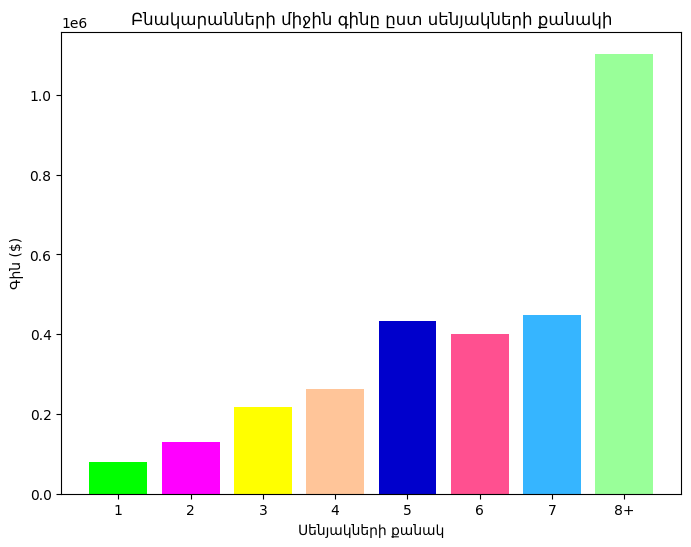

In [ ]:
rooms = Rooms.index
price = Rooms['Գին'].round()
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#00ff00','#ff00ff','#ffff00','#ffc599', '#0000cc', '#ff5090','#36b5ff','#99ff99']
ax.bar(rooms, price, color=colors)
ax.set_title('Բնակարանների միջին գինը ըստ սենյակների քանակի')
ax.set_xlabel('Սենյակների քանակ')
ax.set_ylabel('Գին ($)');
# for i, v in enumerate(price):
#     ax.text(i - 0.25, v + 5, str(v)[:-2] + '$', color='blue', fontweight='bold')

## **4.4 Բնակարանների բաշխվածությունը ըստ շինության տիպի**

In [ ]:
ndf = new_df.head(4)
s = pd.Series(ndf['Քանակ'])
s = s.mul(100) / 16863

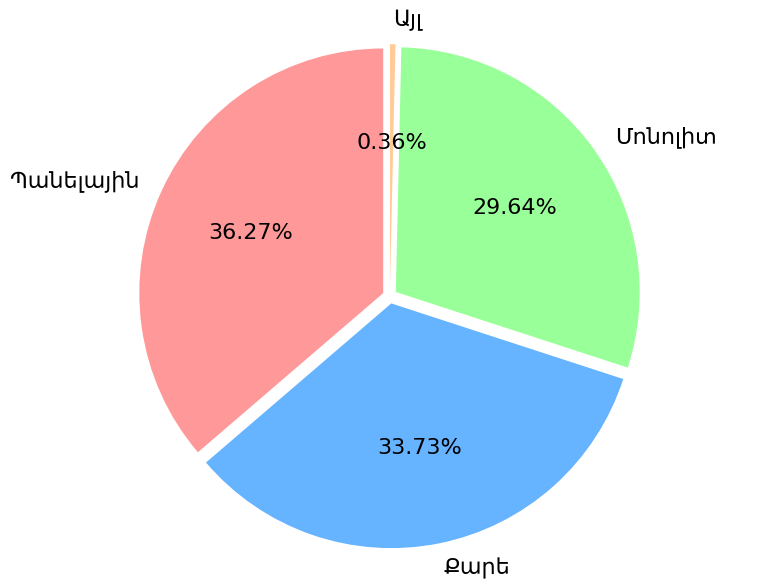

In [ ]:
# Pie chart
labels = ['Պանելային', 'Քարե', 'Մոնոլիտ', 'Այլ']
# colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# explsion
fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.pie(s, colors = colors, labels=labels, autopct='%1.2f%%', startangle=90, pctdistance=0.6, explode=[0.03 for i in range(4)], textprops={'fontsize': 16})
# draw circle
fig = plt.gcf()
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()

plt.show()

## **4.5 Բնակարանների գների կախումը ընդհանուր մակերեսից ըստ տարածաշրջանների**


<ipython-input-87-70bb292cbfc7>:5: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1000000, 50000)


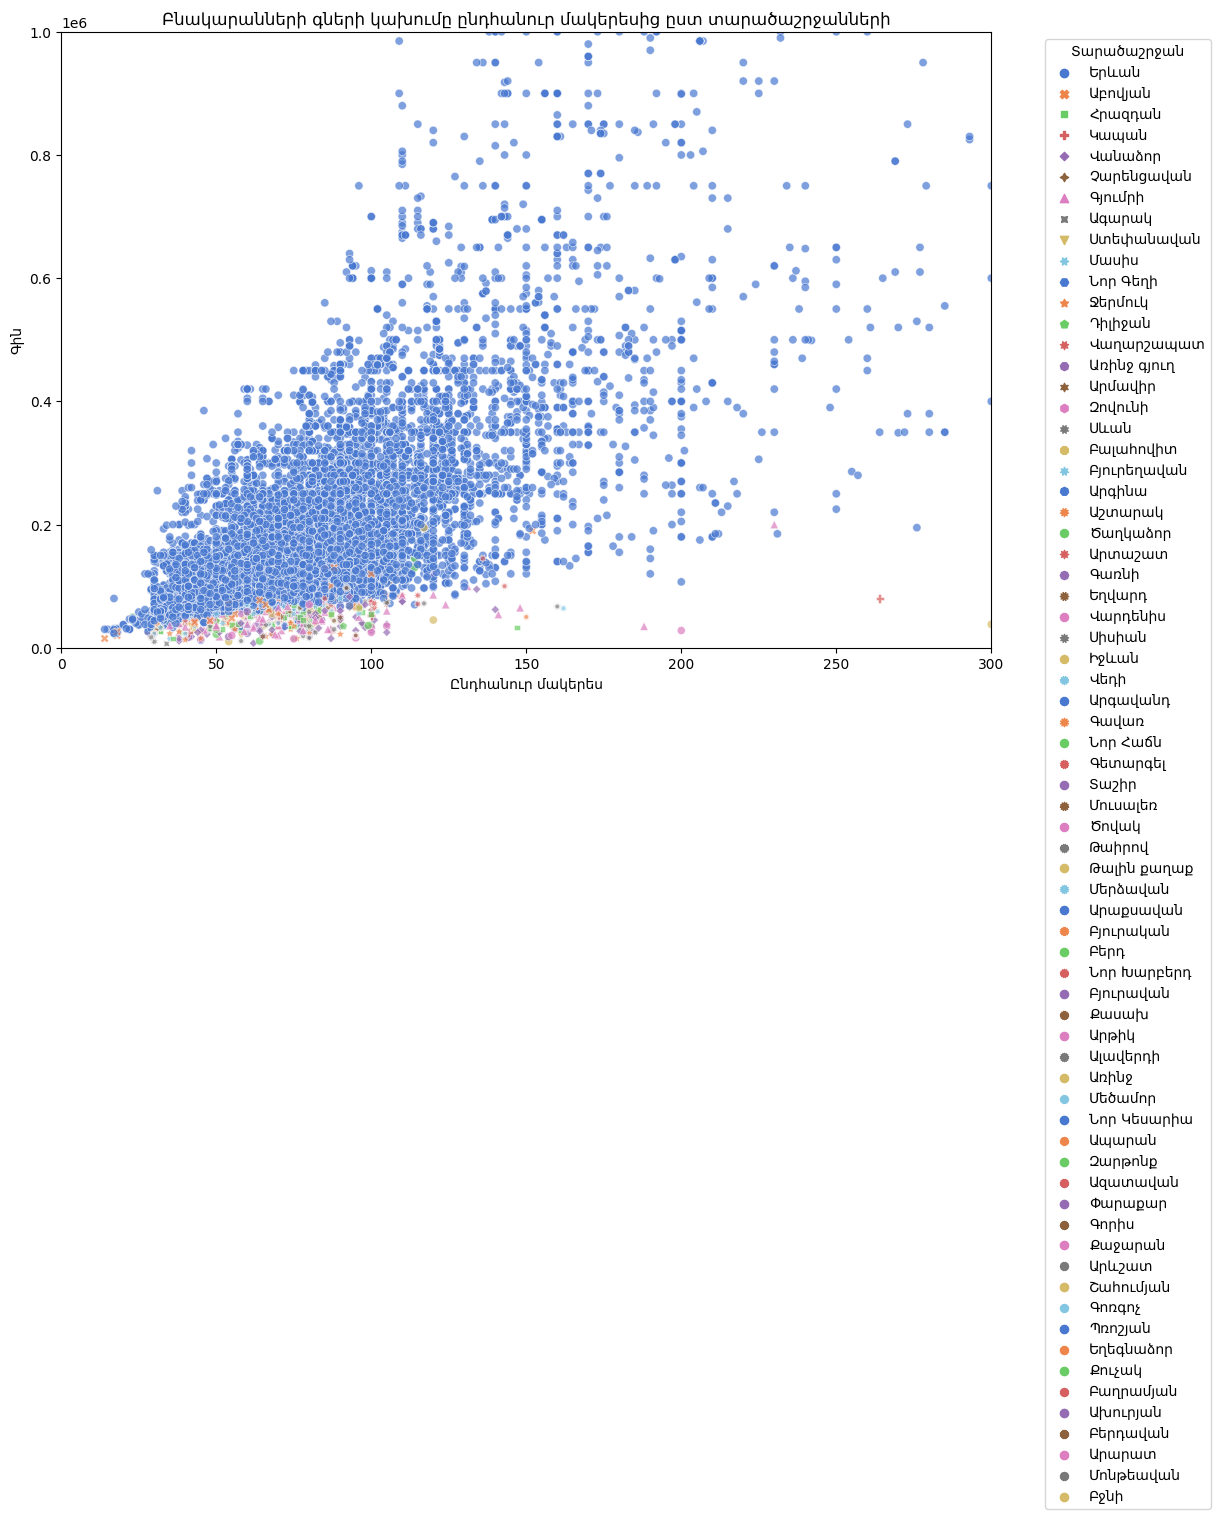

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ընդհանուր մակերես', y='Գին', hue='Տարածաշրջան', data=df, palette='muted', alpha=0.7, style="Տարածաշրջան")
plt.ylim(0, 1000000, 50000)
plt.xlim(0, 300)
plt.title('Բնակարանների գների կախումը ընդհանուր մակերեսից ըստ տարածաշրջանների')
plt.xlabel('Ընդհանուր մակերես')
plt.ylabel('Գին')
plt.legend(title='Տարածաշրջան', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **4.6 Բնակարանների բաշխվածությունը ըստ վերանորոգման**

In [ ]:
grouped_body = df.groupby('Վերանորոգում').size().reset_index(name='count')

# Create a new DataFrame with the "Body style" and "count" columns
df_body = grouped_body[["Վերանորոգում", "count"]]
df_body

,Վերանորոգում,count
0,Դիզայներական ոճով վերանորոգված,1904
1,Եվրովերանորոգված,2504
2,Կապիտալ վերանորոգված,6225
3,Կոսմետիկ վերանորոգում,1753
4,Հին վերանորոգում,2246
5,Մասնակի վերանորոգում,1363
6,Չվերանորոգված,1364


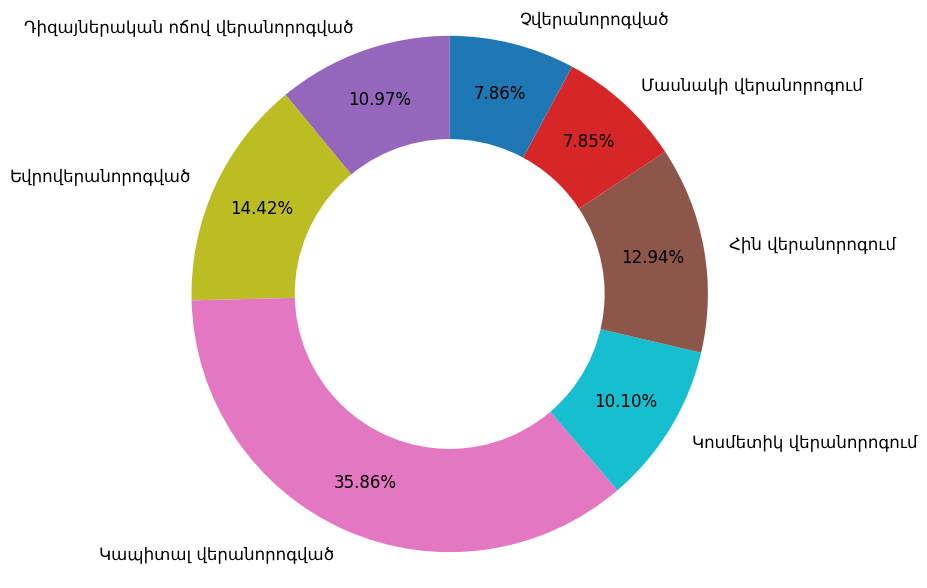

In [ ]:
# Pie chart
labels = ['Դիզայներական ոճով վերանորոգված', 'Եվրովերանորոգված'	, 'Կապիտալ վերանորոգված', 'Կոսմետիկ վերանորոգում',
          'Հին վերանորոգում', 'Մասնակի վերանորոգում', 'Չվերանորոգված']
sizes =  df_body['count']
#colors
colors = ["#9467bd", "#bcbd22","#e377c2","#17becf", "#8c564b", "#d62728", "#1f77b4", "#ff7f0e","#2ca02c"   ]

fig1, ax1 = plt.subplots(figsize=(8 ,6))
ax1.pie(sizes, colors = colors, labels=labels, startangle=90, autopct='%1.2f%%', pctdistance=0.8, textprops={'fontsize': 12})
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show();

## **4.7 Բնակարանների քանակը ըստ սենյակների քանակի**

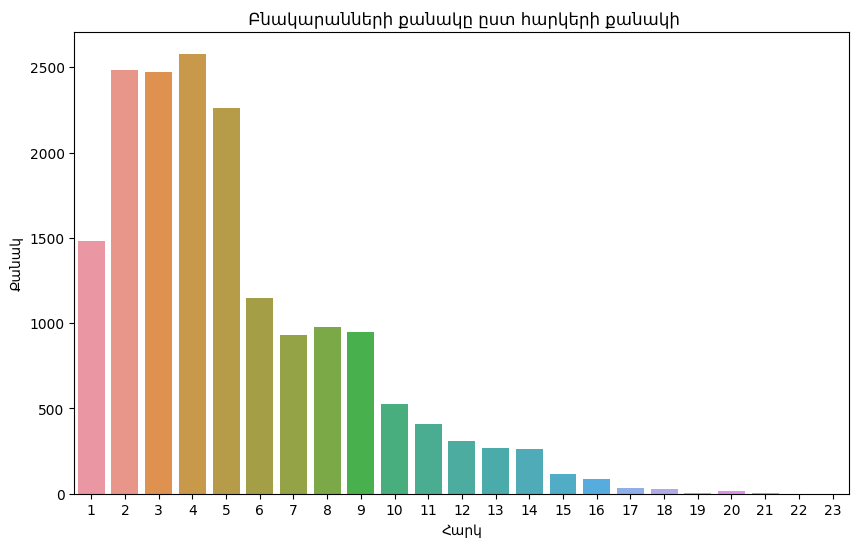

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Հարկ', data=df)
plt.title(' Բնակարանների քանակը ըստ հարկերի քանակի')
plt.xlabel('Հարկ')
plt.ylabel('Քանակ')
plt.show()

## **4.8 Շինության տիպի բաշխվածությունը ըստ հարկի և հարկերի քանակի**

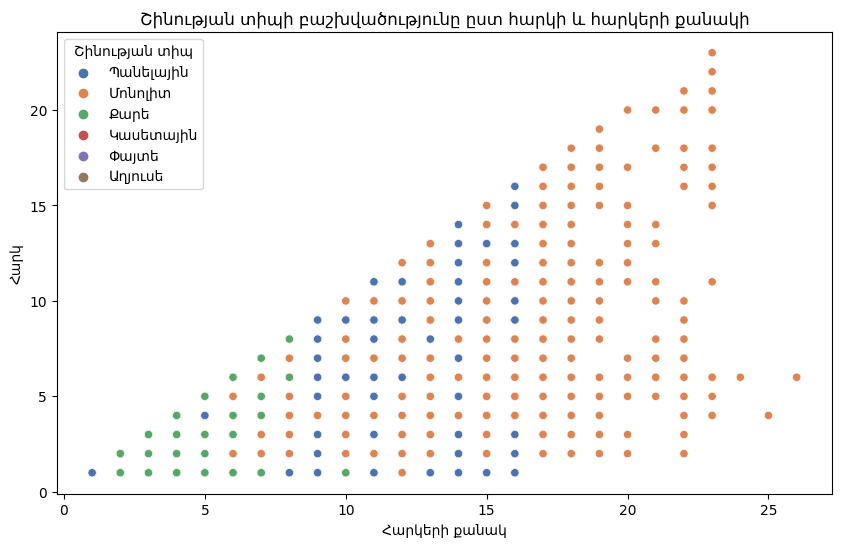

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='Հարկ', x='Հարկերի քանակ', hue='Շինության տիպ', palette="deep")
plt.title('Շինության տիպի բաշխվածությունը ըստ հարկի և հարկերի քանակի')
plt.show()

## **4.9 Գինը կախված վերանորոգումից և կահույքի առկայությունից**

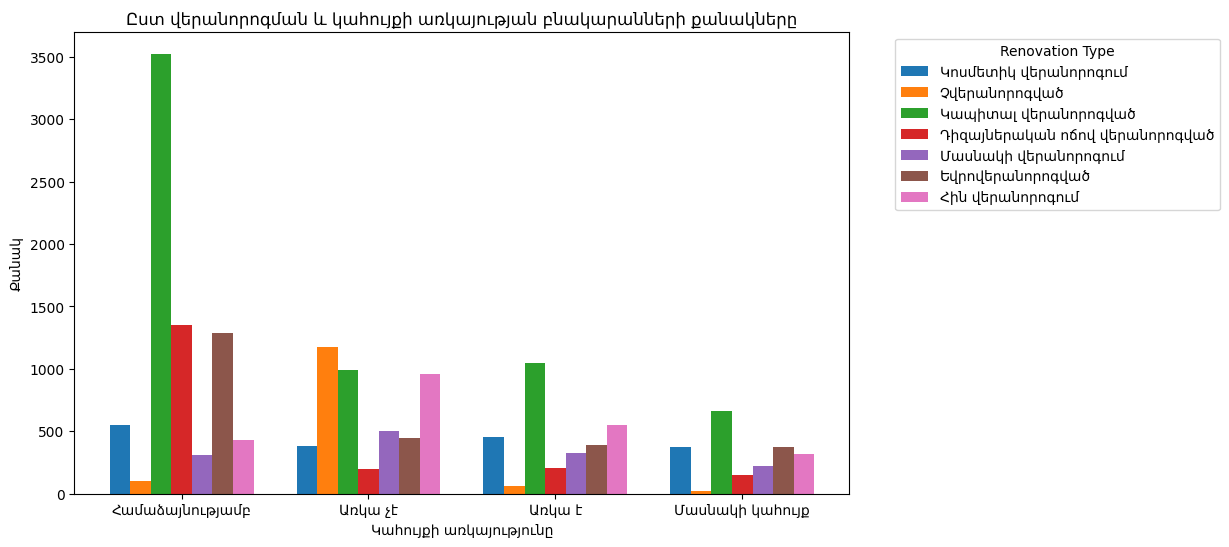

In [ ]:
furniture_types = df['Կահույք'].unique()
renovation_types = df['Վերանորոգում'].unique()

bar_width = 0.11  # Adjust the bar width as needed
num_furniture_types = len(furniture_types)
num_renovation_types = len(renovation_types)

index = np.arange(num_furniture_types)
fig, ax = plt.subplots(figsize=(10, 6))

for i, ren_type in enumerate(renovation_types):
    ax.bar(index + i * bar_width, df[df['Վերանորոգում'] == ren_type]['Կահույք'].value_counts().sort_index(), bar_width, label=ren_type)

ax.set_xlabel('Կահույքի առկայությունը')
ax.set_ylabel('Քանակ')
ax.set_title('Ըստ վերանորոգման և կահույքի առկայության բնակարանների քանակները')
ax.set_xticks(index + (num_renovation_types - 1) * bar_width / 2)
ax.set_xticklabels(furniture_types)
ax.legend(title='Renovation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## **4.10 Բնակարանների քանակը ըստ շինության տիպերի**

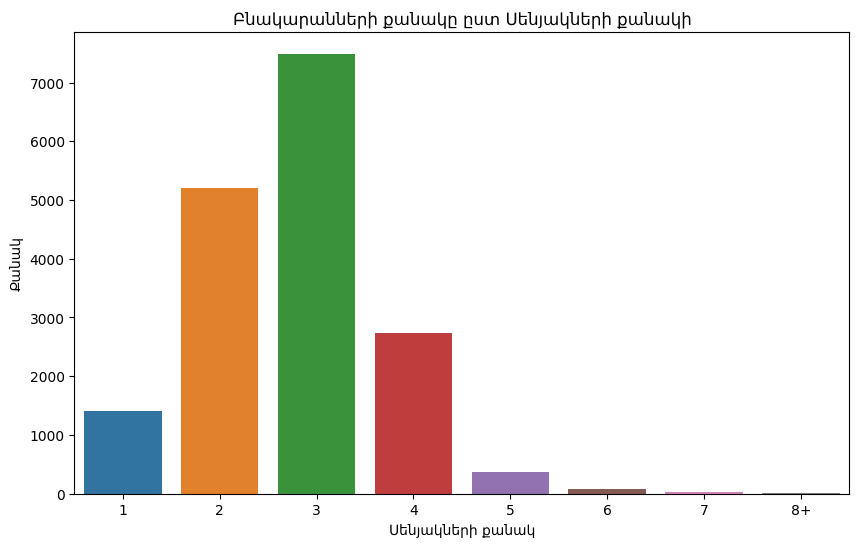

In [ ]:
plt.figure(figsize=(10, 6))
lst = ['1', '2', '3', '4', '5', '6', '7', '8+']
sns.countplot(x='Սենյակների քանակ', data=df, order = lst)
plt.title('Բնակարանների քանակը ըստ Սենյակների քանակի')
plt.xlabel('Սենյակների քանակ')
plt.ylabel('Քանակ')
plt.show()

## **4.11 Գնի կախումը հարկից և սենյակների քանակից**

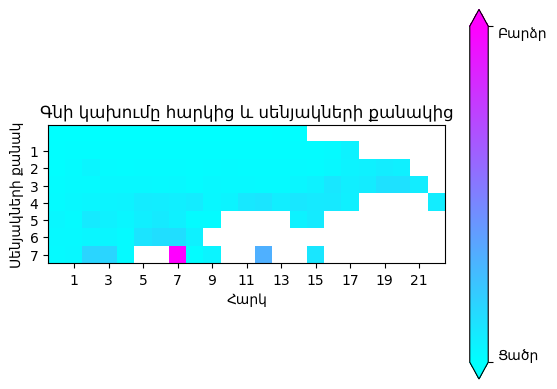

In [ ]:
import matplotlib.ticker as mticker
pivot_table = df.pivot_table(values='Գին', index='Սենյակների քանակ', columns='Հարկ', aggfunc=np.mean)
fig, ax = plt.subplots()
cax = ax.imshow(pivot_table, cmap='cool')
ax.set_title("Գնի կախումը հարկից և սենյակների քանակից")
cbar = fig.colorbar(cax,
                    ticks=[pivot_table.max().max(), pivot_table.min().min()],
                    format=mticker.FixedFormatter(['Բարձր', 'Ցածր']),
                    extend='both')
ax.set_xticks(np.arange(1, len(pivot_table.columns),2))
ax.set_yticks(np.arange(1, len(pivot_table.index)))
labels = cbar.ax.get_yticklabels()
labels[0].set_verticalalignment('top')
labels[-1].set_verticalalignment('bottom')
ax.set_ylabel("Սենյակների քանակ")
ax.set_xlabel("Հարկ")

plt.show()

## **4.12 Գին կախումը  Նորակառույց լինելուց և Վերանորոգումից**

<ipython-input-95-3eb67b87d35e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0f}K'.format(y / 1000) for y in ax.get_yticks()])


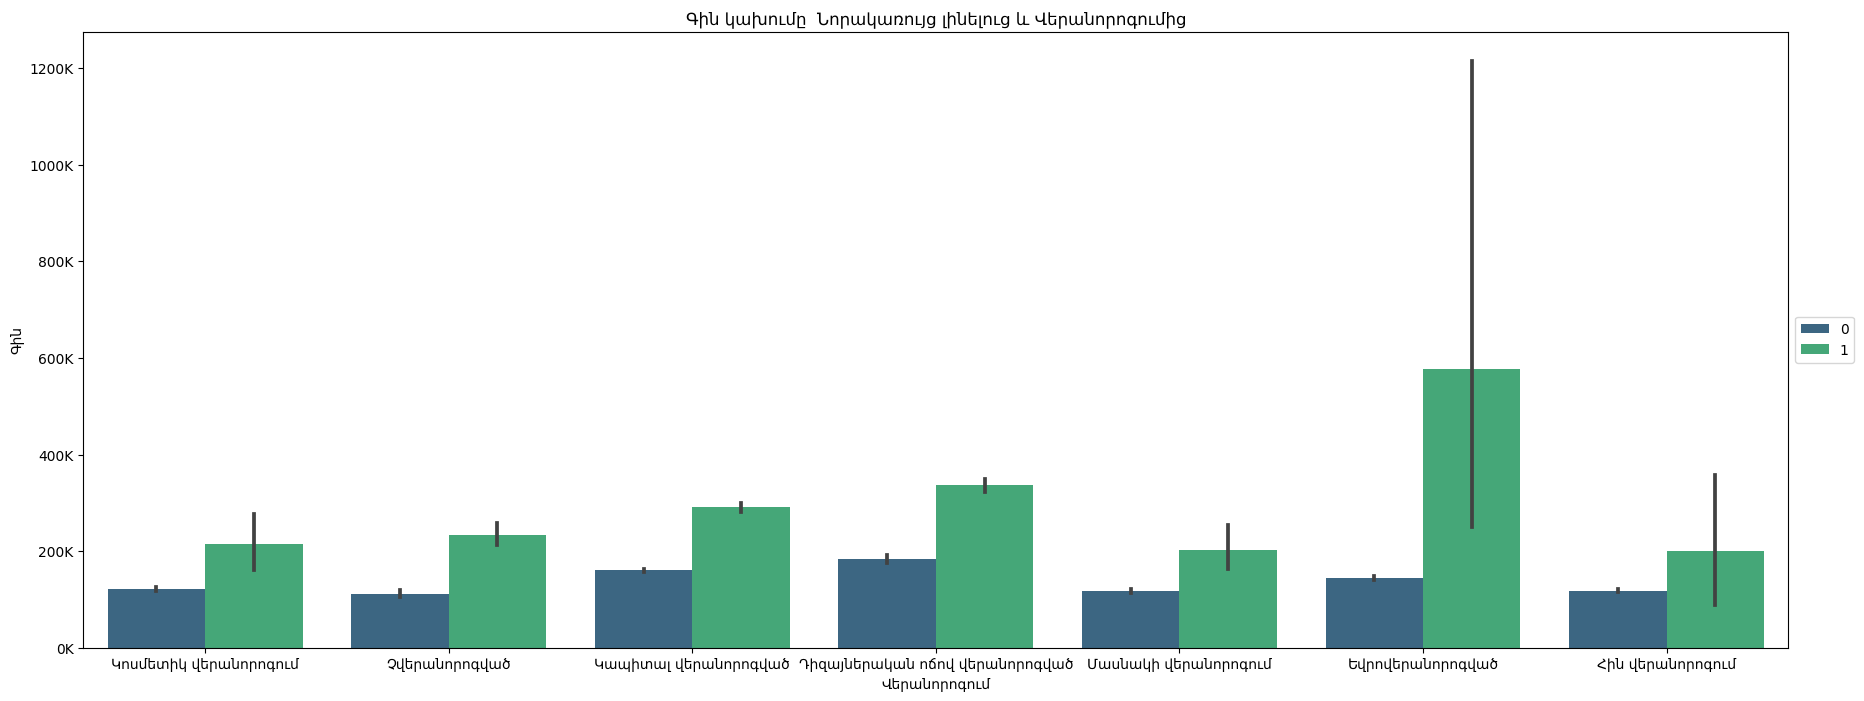

In [ ]:
plt.figure(figsize = (22, 8))
ax = sns.barplot(x='Վերանորոգում', y='Գին', hue='Նորակառույց', data=df, palette='viridis')
ax.set(xlabel='Վերանորոգում', ylabel='Գին')
ax.set_title('Գին կախումը  Նորակառույց լինելուց և Վերանորոգումից')
ax.set_yticklabels(['{:.0f}K'.format(y / 1000) for y in ax.get_yticks()])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## **4.13 Correlation Matrices**

<ipython-input-96-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


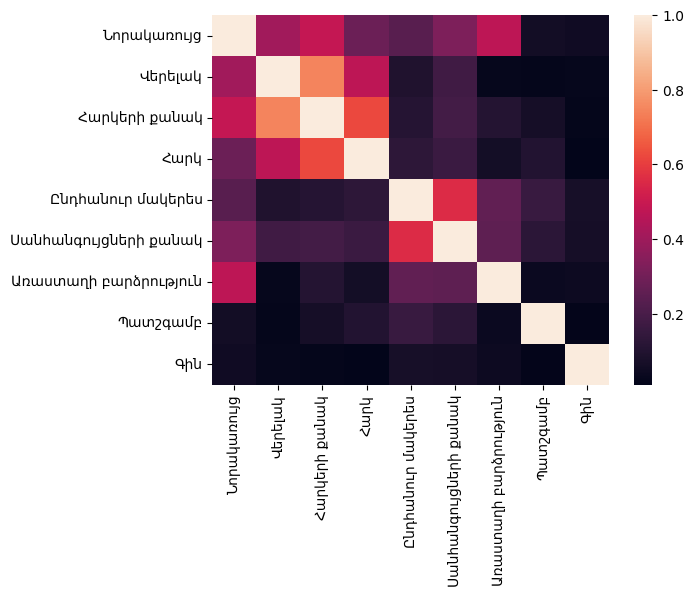

In [ ]:
sns.heatmap(df.corr());

<Axes: >

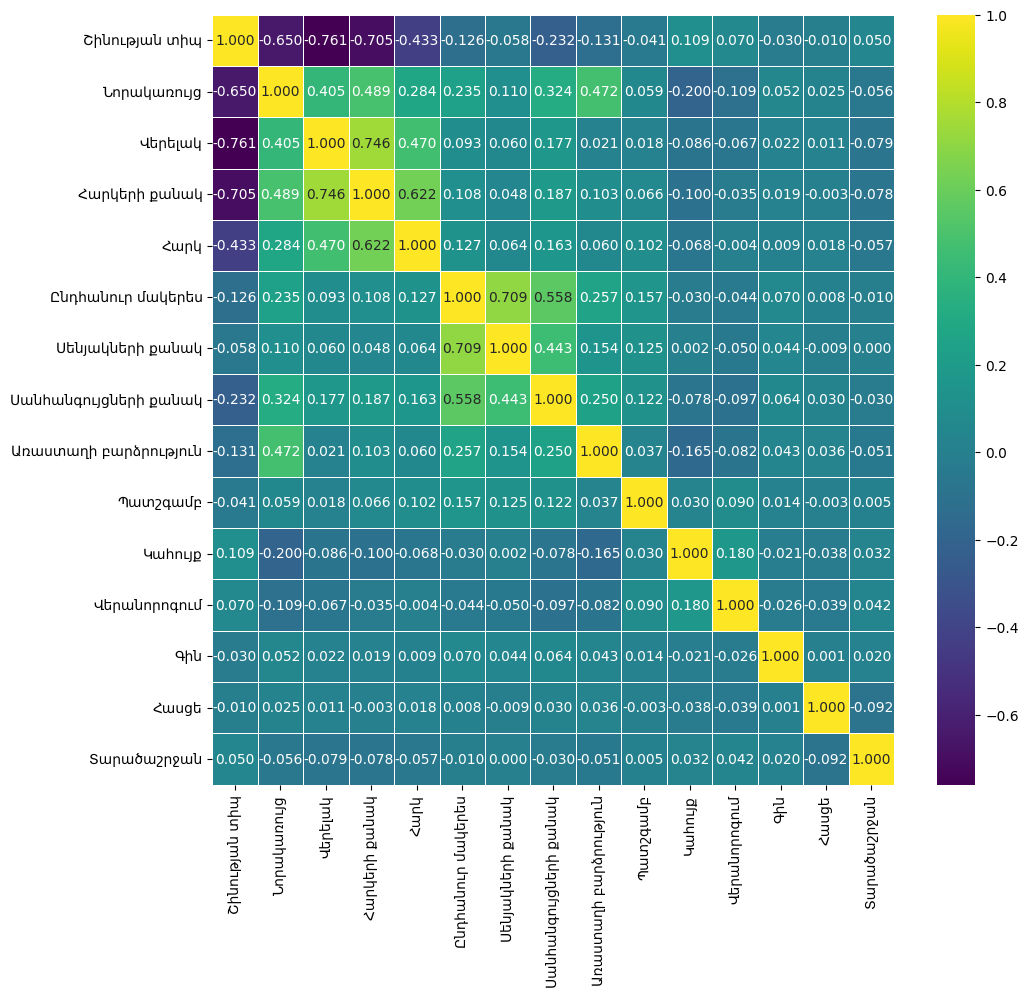

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
plt.figure(figsize=(11, 10))
label_encoder = LabelEncoder()
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

correlation_matrix = df_copy.corr()
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns, cmap="viridis", annot=True, linewidth=.5, fmt=".3f")

<ipython-input-98-5fedec88925e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


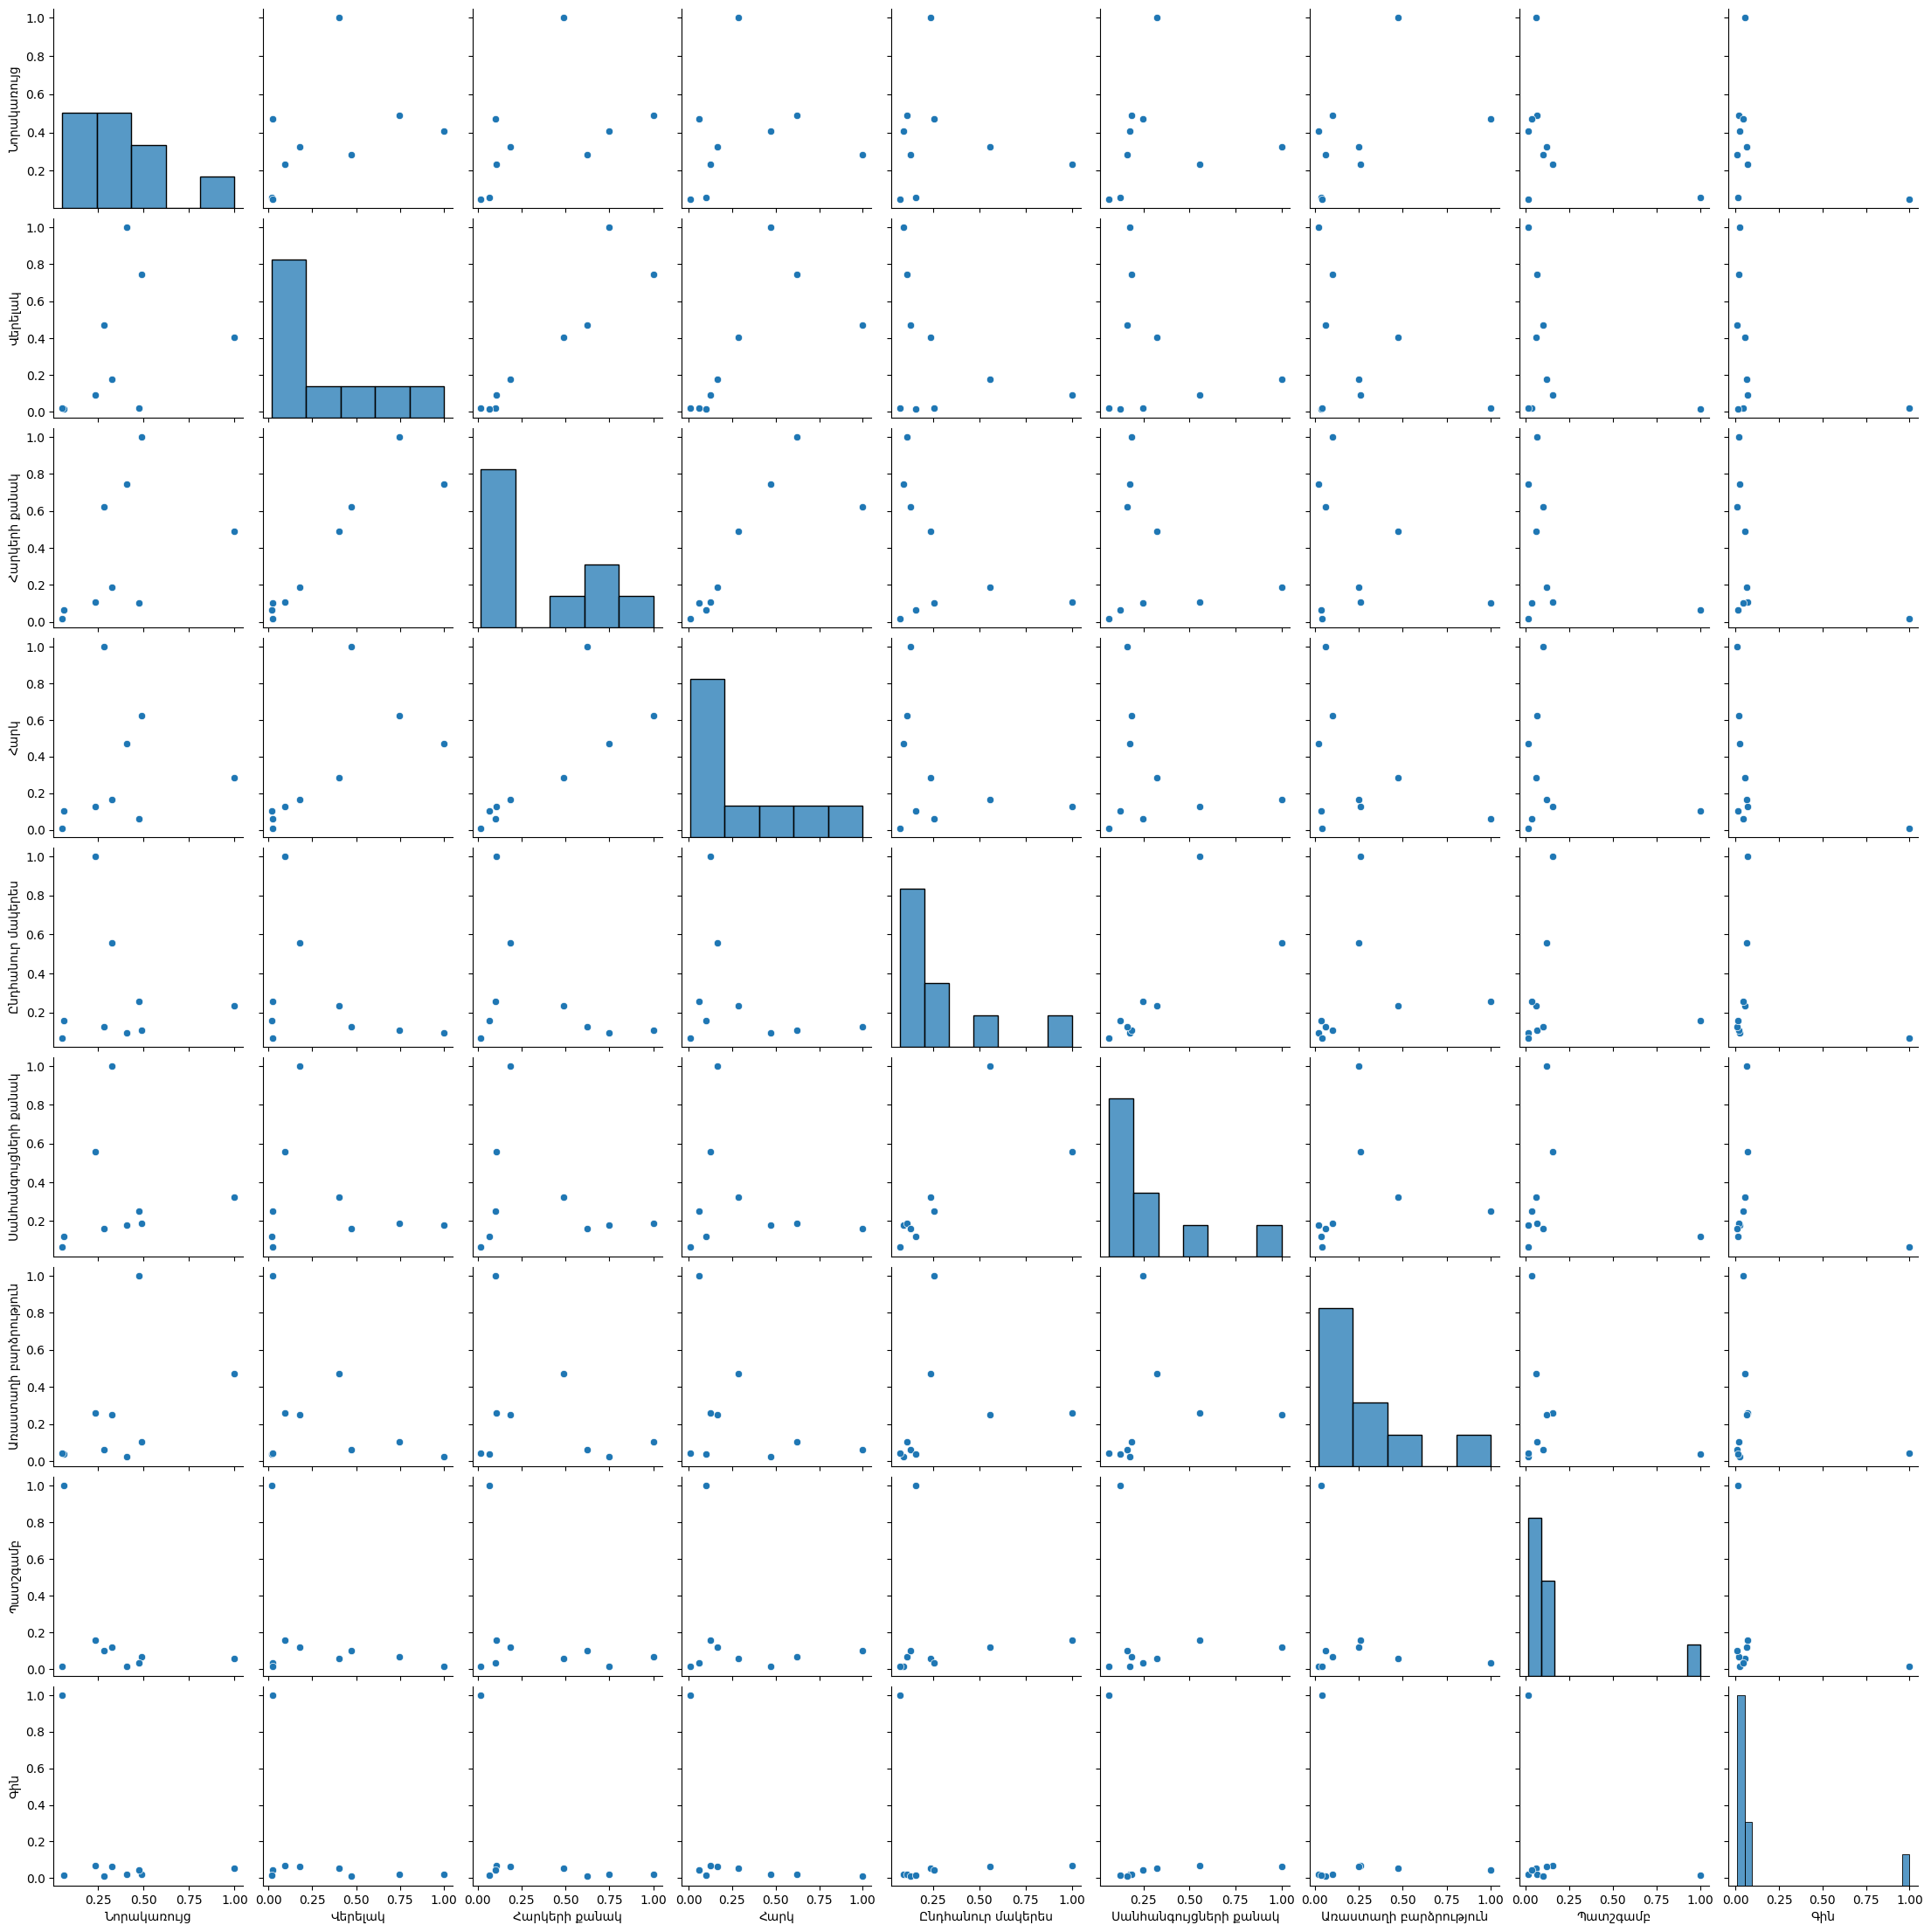

In [ ]:
sns.pairplot(df.corr())

In [ ]:
from geopy.geocoders import Nominatim
import folium

In [ ]:
def get_coordinates(address):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None

In [ ]:
def show_multiple_on_map(addresses):
    map_obj = folium.Map(location=[40, 45], zoom_start=8)  # Set initial map location and zoom

    for address in addresses:
        coordinates = get_coordinates(address)
        if coordinates:
            folium.Marker(location=coordinates, popup=address).add_to(map_obj)
        else:
            pass

    return map_obj

In [ ]:
apartment_addresses = df['Հասցե'][:10]
map_object = show_multiple_on_map(apartment_addresses)

if map_object:
    display(map_object)
else:
    pass

# **5) Conclusion**

Ստացված տվյալների և վերլուծությունների հիման վրա կարող ենք եզրակացնել՝

1) Հայաստանյան վաճառքի ենթակա բնակարանների գերակշիռ մասը գտնվում է Երևանում

2) ՀՀ-ում գերակշռում են կապիտալ վերանորոգված բնակարանները

3) Կա մեծ գնային տարբերություն կախված վերանորոգումից և նորակառույց լինելուց

4) Ամենաթանկարժեք բնակարանները գտնվում են 3-րդից մինչև 7-րդ հարկերում

5) Ցածր հարկերում գերակշռում են քարե շենքերի տները, միջին հարկերում՝ պանելային շենքերի տները, իսկ բարձր հարկերում՝ մոնոլիտ շենքերի տները

6) ՀՀ-ում Բնակարանի միջին արժեքը, կախված սենյակների քանակից, կազմում է
70,000-ից մինչև 1,200,000 ԱՄՆ դոլար

7) ՀՀ-ում ամենաշատը վաճառվում են մինչև 5-րդ հարկում գտնվող բնակարանները

8) ՀՀ-ում գերակշռում են 2-ից 3 սենյականոց բնակարանները

9) Ամենամեծ կորելացիան հարկերի քանակի և վերելակի առկայության, ինչպես նաև մակերեսի և սենյակների քանակի միջև է